In [1]:
import numpy as np
import gzip
from tqdm import tqdm

In [2]:
# ! chmod +x convert_all_PE.sh
# !./convert_all_PE.sh

In [3]:
# read file1
def read_csv_gz(file_path):
    with gzip.open(file_path, 'rt') as f:
        data = np.genfromtxt(f, delimiter=',', names=True, dtype=None, encoding='utf-8')
    return data

In [4]:
# files_list = ['GW230529_Combined_PHM_highSpin.csv.gz',
#               "GW230529_Combined_PHM_lowSecondarySpin.csv.gz",
#               "GW200115_C01:IMRPhenomNSBH:HighSpin.csv.gz",
#               "GW200105_C01:IMRPhenomXPHM.csv.gz",
#               "GW190917_C01:IMRPhenomXPHM.csv.gz",
#               "GW190814_C01:IMRPhenomXPHM.csv.gz",
#               "GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin.csv.gz"]
# for file in tqdm(files_list):
#     data = read_csv_gz(file)
#     assert np.allclose(data['logprior_truth'], data['logprior']), "logprior columns do not match"

In [5]:
df = read_csv_gz("GW190814_C01:IMRPhenomXPHM.csv.gz")

Text(0.5, 0, 'Mass2 Source')

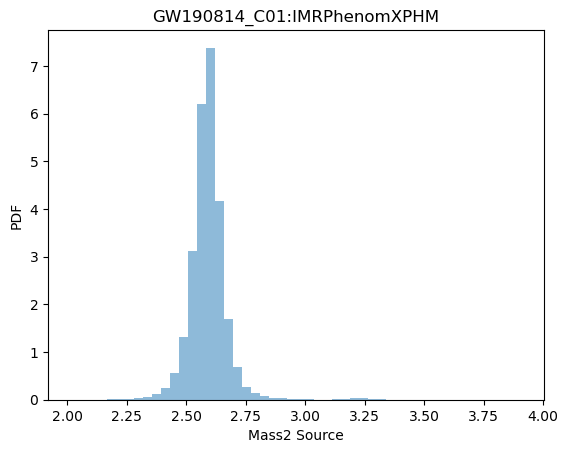

In [7]:
import matplotlib.pyplot as plt
plt.hist(df["mass2_source"], bins = 50, density=True, alpha=0.5, label="mass2_source")
plt.ylabel("PDF")
plt.title("GW190814_C01:IMRPhenomXPHM")
plt.xlabel("Mass2 Source")